<a href="https://colab.research.google.com/github/itsTurner/ben-learns-ml/blob/main/LinearPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt


Import linearly seperable data

In [ ]:
fullData = pd.read_csv('linearPerceptron_data.csv')
#fullData comprises of Feature1, Feature2, Type
shuffledData = fullData #.sample(frac=1)
X_train, X_test, y_train, y_test = train_test_split(shuffledData[['Feature1', 'Feature2']], shuffledData['Type'], test_size=0.4, random_state=42)
X_trainFeature1 = X_train['Feature1']
X_trainFeature2 = X_train['Feature2']
X_testFeature1 = X_test['Feature1']
X_testFeature2 = X_test['Feature2']
print(X_trainFeature1)
print(X_trainFeature2)
print(X_testFeature1)
print(X_testFeature2)

24    -2.775685
467   -1.376136
539    7.791201
531    7.421661
618    6.351925
         ...   
106    4.961069
270    8.949121
860    1.922936
435    8.537996
102    2.521690
Name: Feature1, Length: 600, dtype: float64
24     3.448006
467    8.421547
539    6.680701
531    6.540749
618    3.656170
         ...   
106    7.002749
270    4.345781
860    5.925546
435    3.389131
102    6.285478
Name: Feature2, Length: 600, dtype: float64
521    -0.142110
737     7.466152
740    -2.974605
660    11.482592
411    -1.436440
         ...    
56     -0.322133
405    -4.344155
442    -2.886431
757    -1.851757
997    -0.289108
Name: Feature1, Length: 400, dtype: float64
521    5.017214
737    5.342828
740    6.969161
660    7.246493
411    4.263085
         ...   
56     5.630451
405    5.111898
442    4.714488
757    4.554251
997    7.079545
Name: Feature2, Length: 400, dtype: float64


Sort the data into the 1 and 0

In [ ]:
pInputs = []
nInputs = []
for index, element in enumerate(y_train):
  
  if element == 1:
    try:
      pInputs.append([X_trainFeature1[index], X_trainFeature2[index]])
      print(X_trainFeature1[index])
    except:
      print("Some Sucky stuff that I don't want to deal with ", index + 1)
  elif element == 0:
    try:
      nInputs.append([X_trainFeature1[index] ,X_trainFeature2[index]])
    except:
      print("Some Sucky stuff that I don't want to deal with ", index + 1)
  else:
    print("Bad data", element)

testInputs = []
testOutputs = []
for index, element in enumerate(y_test):
  try:
    testInputs.append([X_testFeature2[index],X_testFeature1[index]])
    testOutputs.append(y_test[index])
  except:
    print("More bad data I don't want to deal with", element)



print(pInputs)
print(nInputs)
print(testInputs)
print(testOutputs)

Some Sucky stuff that I don't want to deal with  1
Some Sucky stuff that I don't want to deal with  3
Some Sucky stuff that I don't want to deal with  4
2.26465075940064
Some Sucky stuff that I don't want to deal with  6
Some Sucky stuff that I don't want to deal with  7
Some Sucky stuff that I don't want to deal with  8
Some Sucky stuff that I don't want to deal with  10
Some Sucky stuff that I don't want to deal with  11
7.166714252273089
0.41178953774187294
-0.152212917642372
6.59543119504699
7.53550921998106
6.549555180265219
Some Sucky stuff that I don't want to deal with  24
Some Sucky stuff that I don't want to deal with  26
9.42201802777236
9.9342601408036
Some Sucky stuff that I don't want to deal with  29
Some Sucky stuff that I don't want to deal with  30
Some Sucky stuff that I don't want to deal with  31
Some Sucky stuff that I don't want to deal with  32
-1.4084921430976298
Some Sucky stuff that I don't want to deal with  34
8.30395626397403
8.114587270492441
-0.253970340

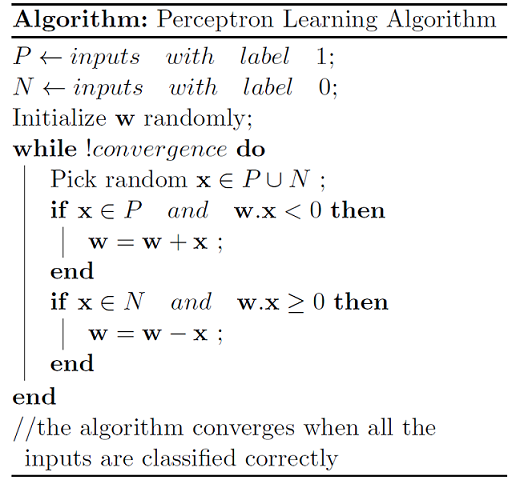

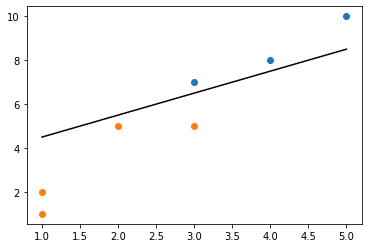

In [ ]:
class LinearPerceptron:
  def __init__ (self, inputP, inputN, learningRate, bias = 0, n_iters=100):
    self.inputP = inputP
    self.inputN = inputN
    self.learningRate = learningRate
    self.n_iters = n_iters
    self.weights = np.zeros(len(inputP[0]))
    self.bias = bias
    #self.iters = iters

  def _predict(self, input):
    return np.where(np.dot(input, self.weights) + self.bias <= 0, 0, 1)
    #return 0 if np.dot(input, self.weights) + self.bias < 0 else 1

  def update(self, input, output):
    #print("output",output)

    update = self.learningRate* (output - self._predict(input))
    # if np.dot(input, self.weights) < 0:
    #   print("update", update)
    #   print("dot product", np.dot(input, self.weights))
    
    self.weights += update * input
    self.bias += update


    # if self._predict(input) == 0 and output == 1:
    #   self.weights += input * (self.learningRate)
    #   self.bias += (self.learningRate)
    #   #print("predicted incorrectly")
    # elif self._predict(input) == 1 and output == 0:
    #   self.weights -= input * (self.learningRate)
    #   self.bias -= (self.learningRate)
    #   print("predicted incorrectly")
    # else:
    #   print("predicted correctly")
  
  
  def learn(self):
    for _ in range(self.n_iters):
      
      for i in self.inputP:
        self.update(i, 1)
        #print("Input P dot product", np.dot(self.weights, i))
      for i in self.inputN:
        #print("Input N dot product", np.dot(self.weights, i))
        self.update(i, 0)
      #print("weights", self.weights)
      #print("bias", self.bias)
if __name__ == "__main__":
  inputOnes = np.array([[5, 10], [3, 7], [4, 8]])
  inputZeros = np.array([[1, 1], [3, 5], [1, 2], [2, 5]])
  perceptron = LinearPerceptron(inputZeros, inputOnes, 0.3)
  perceptron.learn()

  plt.scatter([i[0] for i in inputOnes], [i[1] for i in inputOnes], marker = 'o')

  plt.scatter([i[0] for i in inputZeros], [i[1] for i in inputZeros], marker = 'o')  

  x0_1 = np.amin([i[0] for i in inputZeros])
  x0_2 = np.amax([i[0] for i in inputOnes])

  x1_1 = (-perceptron.weights[0] * x0_1 - perceptron.bias) / perceptron.weights[1]
  x1_2 = (-perceptron.weights[0] * x0_2 - perceptron.bias) / perceptron.weights[1]

  plt.plot([x0_1, x0_2],[x1_1, x1_2], 'k')


element is [5.95353418563353, -1.41487502310778]
weight is [-510.20346042 -947.97144233]
Dot product of stuff 8126.147373132395
1 0 [5.95353418563353, -1.41487502310778]
element is [4.57262552277749, -1.24072076739177]
weight is [-510.20346042 -947.97144233]
Dot product of stuff 8665.598490466115
1 0 [4.57262552277749, -1.24072076739177]
element is [5.9658034829741, 7.2645138006475305]
weight is [-510.20346042 -947.97144233]
Dot product of stuff -107.92520660300761
0 1 [5.9658034829741, 7.2645138006475305]
element is [6.641502899890679, 7.13369373319475]
weight is [-510.20346042 -947.97144233]
Dot product of stuff -328.6556992886399
0 1 [6.641502899890679, 7.13369373319475]
element is [6.15804550425996, 1.98913803761862]
weight is [-510.20346042 -947.97144233]
Dot product of stuff 4794.897819796264
1 0 [6.15804550425996, 1.98913803761862]
element is [4.12364631998241, 1.67454614120532]
weight is [-510.20346042 -947.97144233]
Dot product of stuff 6131.079457276486
1 0 [4.12364631998241,

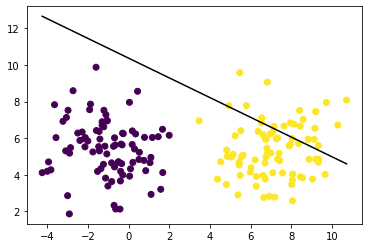

In [ ]:
percept = LinearPerceptron(np.array(nInputs), np.array(pInputs), 0.1, 10000, 10)
percept.learn()
correct = 0
for index, element in enumerate(testInputs):
  print("element is", element)
  print("weight is", percept.weights)
  print("Dot product of stuff", np.dot(element, percept.weights) + percept.bias)

  if percept._predict(element) == testOutputs[index]:
    #print("Correct")
    #print(element)
    correct+=1
  else:
    print(percept._predict(element), testOutputs[index], element)

print("Percentage is", correct/len(testInputs))
print("Number tested", len(testOutputs))
print("Number correct", correct)
fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
#print("inputs are", [i[0] for i in testInputs])
plt.scatter([i[1] for i in testInputs], [i[0] for i in testInputs], marker = 'o', c=testOutputs)

print(percept.weights)

x0_1 = np.amin([i[1] for i in testInputs])
x0_2 = np.amax([i[1] for i in testInputs])

x1_1 = (-percept.weights[0] * x0_1 - percept.bias) / percept.weights[1]
x1_2 = (-percept.weights[0] * x0_2 - percept.bias) / percept.weights[1]

plt.plot([x0_1, x0_2],[x1_1, x1_2], 'k')

#plt.plot(percept.weights[0]*pec*x+percept.bias)
